## Association Analysis - 연관 분석

In [57]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# 그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats
# 사이킷런 ≥0.20 필수 : 0.20에서 데이터 변환을 위한 Transformer클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈련용 데이터가
# 자주 변경이 되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

import pandas as pd
import numpy as np


### 네이버 지식인 데이터를 크롤링해서 단어 추천하기

In [2]:
from bs4 import BeautifulSoup
import urllib
import requests
import time

# 크롤링 할 문자열을 저장할 list
textlist = []

# 크롤링 할 URL 생성
target_url="https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=" + urllib.parse.quote('당구') + "&start="
print(target_url)

# 10개씩 1000개의 URL 읽기
for n in range(1, 1000, 10):
    response = urllib.request.urlopen(target_url + str(n))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.select('div.question_area > div.question_group > a')
    for line in tmp:
        print(line.text)
        textlist.append(line.text)
    time.sleep(0.5)
print(textlist)

https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=%EB%8B%B9%EA%B5%AC&start=
당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?
당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.
당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?
임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?
당구큐대 상대 알리익스프레스에서 당구큐를 구입하였습니다. Zokue cue 라는 이름인데요. 사진과 같습니다. 상대만 구입해서 상대를 교체해볼려고 하는데 여기애 맞는 상댜 규격이 따로 있는걸까요?
당구3국큐미스내도점수인정
중고 당구 개인큐 구매 중고로 당구 개인큐 하나 장만하려하는데 괜찮을까요?? 입문한지 얼마 안됐습니다 도합 28만원에 주신다네요 전문가님들 어떤지 알려주세요
당구의 유례를 알고싶어요 당구가 어디에서 시작되었는지 부탁드립니다
당구를 전혀 해본 적없습니다 당구를 배우고 싶은데 당구를 하면 건강에 나쁘다던가 그런점 없겠죠? 당구의 장점과 당구의 단점은 뭐가 있을까요?
당구 큐칙 좀 알려주세요. 당구 기초와 당구 큐칙 좀 알려주세요.
당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?
당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.
당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?
임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?
당구큐대 상

In [13]:
from bs4 import BeautifulSoup
import urllib
import requests
import time

# 크롤링 할 문자열을 저장할 list
textlist = []

# 크롤링 할 URL 생성
target_url="https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=" + urllib.parse.quote('당구') + "&start="
print(target_url)

# 10개씩 1000개의 URL 읽기
for n in range(1, 1000, 10):
    url = target_url + str(n)
    try :
        response = requests.get(url)
        soup = BeautifulSoup(response.text,  "html.parser")
        tmp = soup.select('div.question_area > div.question_group > a')
        for line in tmp:
            print(line.text)
            textlist.append(line.text)
    except :
        print("예외 발생")
    time.sleep(0.5)



https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=%EB%8B%B9%EA%B5%AC&start=
당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?
당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.
당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?
임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?
당구큐대 상대 알리익스프레스에서 당구큐를 구입하였습니다. Zokue cue 라는 이름인데요. 사진과 같습니다. 상대만 구입해서 상대를 교체해볼려고 하는데 여기애 맞는 상댜 규격이 따로 있는걸까요?
당구3국큐미스내도점수인정
중고 당구 개인큐 구매 중고로 당구 개인큐 하나 장만하려하는데 괜찮을까요?? 입문한지 얼마 안됐습니다 도합 28만원에 주신다네요 전문가님들 어떤지 알려주세요
당구의 유례를 알고싶어요 당구가 어디에서 시작되었는지 부탁드립니다
당구를 전혀 해본 적없습니다 당구를 배우고 싶은데 당구를 하면 건강에 나쁘다던가 그런점 없겠죠? 당구의 장점과 당구의 단점은 뭐가 있을까요?
당구 큐칙 좀 알려주세요. 당구 기초와 당구 큐칙 좀 알려주세요.
당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?
당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.
당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?
임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?
당구큐대 상

In [12]:
print(textlist)

['당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?', '당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.', '당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?', '임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?', '당구큐대 상대 알리익스프레스에서 당구큐를 구입하였습니다. Zokue cue 라는 이름인데요. 사진과 같습니다. 상대만 구입해서 상대를 교체해볼려고 하는데 여기애 맞는 상댜 규격이 따로 있는걸까요?', '당구3국큐미스내도점수인정', '중고 당구 개인큐 구매 중고로 당구 개인큐 하나 장만하려하는데 괜찮을까요?? 입문한지 얼마 안됐습니다 도합 28만원에 주신다네요 전문가님들 어떤지 알려주세요', '당구의 유례를 알고싶어요 당구가 어디에서 시작되었는지 부탁드립니다', '당구를 전혀 해본 적없습니다 당구를 배우고 싶은데 당구를 하면 건강에 나쁘다던가 그런점 없겠죠? 당구의 장점과 당구의 단점은 뭐가 있을까요?', '당구 큐칙 좀 알려주세요. 당구 기초와 당구 큐칙 좀 알려주세요.', '당구에 길다마뜻이 ? 당구칠때 길다마라는 말을하는데 그것의 정확한 뜻이 뭔가요?', '당구 도서 추천바랍니다 설명과 오류가 없는 당구 도서를 추천바랍니다. 피상적인 답변 말고요.', '당구를 500치는 일반인이 주된 손이 아닌 왼손으로만 당구 1,500~2,000을 치는 사람을 정상적인 경기에서 둘다 컨디션이 무난한 상태에서 이길 확률이 얼만큼 있나용?', '임영웅 당구도 잘 친다는데... 임영웅 만능 스포츠맨~ 당구도 잘 친다는 소문을 들었어요 당구 치는 모습의 짤 볼 수 있을까요?', '당구큐대 상대 알리익스프레스에서 당구큐를 구입하였습니다. Zokue cue 라는 이름인데요. 사진과 같습니다.

In [2]:
# 네이버지식인 오류나서 동아일보로 재진행
from bs4 import BeautifulSoup
import urllib
import requests
import time

# 크롤링 할 문자열을 저장할 list
textlist = []

# 크롤링 할 URL 생성
target_url="https://www.donga.com/news/search?p=16&query="+ urllib.parse.quote('주식') +"&check_news=91&more=1&sorting=1&search_date=1&v1=&v2="
print(target_url)

# 10개씩 1000개의 URL 읽기
for n in range(1, 1000, 10):
    url = target_url + str(n)
    try :
        response = requests.get(url)
        soup = BeautifulSoup(response.text,  "html.parser")
        tmp = soup.select('div.rightList > span.txt > a')
        for line in tmp:
            print(line.getText())
            textlist.append(line.getText())
    except :
        print("예외 발생")
    time.sleep(0.5)



https://www.donga.com/news/search?p=16&query=%EC%A3%BC%EC%8B%9D&check_news=91&more=1&sorting=1&search_date=1&v1=&v2=
... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...
...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...
... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...
... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...
... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...
... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...
... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...
■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...
... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...
... 50억 원은 유상증자로, 나머지 50억 원은 홍진영 보유주식을 인수했다.동아닷컴 홍세영 기자 pr

In [3]:
print(textlist)

['... 생산할 수 있으며, LG화학과의 합작법인인 한국전구체주식회사(KPC)를 통해 배터리 양극재 핵심 원료인 전구체를 연간 2만 톤 규모로 양산할 예정이다. 아울러 전해동박을 생산하는 ...', '...  우리은행, 그린웨이브, 우리관리주식회사, 국민건강보험공단, 가톨릭관동대학교, 서울특별시사회복지협의회, 부산은행이 참여했다.협약에 참여한 기관 및 기업들은 사무용 가구 ...', '... 펼치면서 전성기를 맞이했다. 농심의 전신인 롯데공업주식회사의 ‘롯데라면’이 출시된 것도 이 무렵이다. 이밖에도 ‘풍년라면’(풍년식품), ‘닭표라면’(신한제분), ...', '... 리피니티브에 따르면 기관 투자자들은 미국 중심의 주식 뮤추얼펀드와 상장지수펀드에서 5주 연속 자본을 빼내 차익 실현에 나섰다. 지역 중소은행의 위기가 있었던 3월 중순의 11주 ...', '... 2월 이후 가장 높은 수치를 기록했죠. 이에 따라 주식시장에선 이달 19~20일 FOMC에서 연준이 기준금리를 동결할 거라는 믿음이 더 강화되고 있습니다.중국 증시는 이날 모처럼 활기를 ...', '... 연구위원은 “중국발 부동산 위기 등으로 인해 주식시장도 큰 폭으로 조정받을 수 있다는 불안감이 커지고 있다”라며 “중국 정부가 제대로 된 처방전을 내놓지 못하면 한국이나 ...', '... 10월 이후에는 실질금리가 크게 하락하지 않았는데도 주식시장은 반등에 성공했다. 인플레이션이 정점을 통과했다는 기대가 투자심리 회복에 기여했다. 실제 지난해 10월부터 올해  ...', '■ 롯데카드, 토스모바일 할인 신용카드 출시 롯데카드는 알뜰폰 사업자 ‘토스모바일’의  ...  주주들은 명의개서 대행기관 홈페이지를 통해 미수령 주식 유무를 확인할 수 있다 ...', '... 자산 배분이고 주식 자산 중에서 미국 주식과 한국 주식으로 나눠 투자하면 ‘국가에 대한 분산 투자’가 된다. 글로벌 자산 배분형 펀드는 다각화 효과를 적극 활용할 수 있는 ...', '... 50억 원은 유상증자로, 나머지 50억 원은 

In [4]:
# 형태소 분석
from konlpy.tag import Okt

okt = Okt()
# 한글 형태소 분석기는 하나의 문장에만 가능하므로 list의 데이터를 하나의 문장으로 변경
present_text = ''
for line in textlist:
    present_text = present_text + line + "\n"
tokens_ko = okt.morphs(present_text)
print(tokens_ko)


['...', '생산', '할', '수', '있으며', ',', 'LG', '화학', '과의', '합작', '법인', '인', '한국', '전', '구체', '주식회사', '(', 'KPC', ')', '를', '통해', '배터리', '양', '극', '재', '핵심', '원료', '인', '전', '구체', '를', '연간', '2만', '톤', '규모', '로', '양산', '할', '예정', '이다', '.', '아울러', '전해', '동', '박', '을', '생산', '하는', '...', '\n', '...', '우리은행', ',', '그린', '웨이브', ',', '우리', '관리', '주식회사', ',', '국민', '건강', '보험', '공단', ',', '가톨릭', '관동', '대학교', ',', '서울특별시', '사', '회복', '지협', '의회', ',', '부산', '은행', '이', '참여', '했다', '.', '협약', '에', '참여', '한', '기관', '및', '기업', '들', '은', '사', '무용', '가구', '...', '\n', '...', '펼치면서', '전성기', '를', '맞이', '했다', '.', '농심', '의', '전신', '인', '롯데', '공업', '주식회사', '의', '‘', '롯데', '라면', '’', '이', '출시', '된', '것', '도', '이', '무렵', '이다', '.', '이', '밖에도', '‘', '풍년', '라면', '’(', '풍년', '식품', '),', '‘', '닭표', '라면', '’(', '신', '한', '제분', '),', '...', '\n', '...', '리피', '니', '티브', '에', '따르면', '기관', '투자자', '들', '은', '미국', '중심', '의', '주식', '뮤추얼펀드', '와', '상장', '지수', '펀드', '에서', '5', '주', '연속', '자본', '을', '빼내', '차익', '실현', '에', '나섰

In [5]:
# 형태소 분석된 결과를 숫자로 변경
import nltk

ko = nltk.Text(tokens_ko, name='주식')
print(ko.vocab().most_common(100))

[('...', 3000), ('.', 1800), ('을', 1600), ('\n', 1500), ('이', 1400), (',', 1200), ('를', 1100), ('주식', 1100), ('에', 1000), ('은', 900), ('의', 900), ('했다', 700), ('한', 700), ('‘', 600), ('가', 600), ('할', 500), ('인', 500), ('수', 400), ('주식회사', 400), ('들', 400), ('롯데', 400), ('’', 400), ('는', 400), ('등', 400), ('투자', 400), ('한국', 300), ('로', 300), ('보험', 300), ('기관', 300), ('라면', 300), ('출시', 300), ('도', 300), ('미국', 300), ('와', 300), ('에서', 300), ('주식시장', 300), ('중국', 300), ('으로', 300), ('있다', 300), ('자산', 300), ('원', 300), ('생산', 200), ('법인', 200), ('전', 200), ('구체', 200), ('(', 200), (')', 200), ('통해', 200), ('이다', 200), ('하는', 200), ('사', 200), ('회복', 200), ('은행', 200), ('참여', 200), ('된', 200), ('풍년', 200), ('’(', 200), ('),', 200), ('투자자', 200), ('펀드', 200), ('주', 200), ('위기', 200), ('이후', 200), ('연', 200), ('라는', 200), ('“', 200), ('하면', 200), ('10월', 200), ('카드', 200), ('토스', 200), ('모바일', 200), ('배분', 200), ('과', 200), ('된다', 200), ('50억', 200), ('보유', 200), ('기자', 200), ('설립', 200)

In [6]:
# 불필요하게 많이 등장하는 텍스트(stopwords)를 제거
# stopwords
stop_words=["...","..",".","\n"]
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko = [each_word for each_word in tokens_ko if len(each_word) > 1]
ko = nltk.Text(tokens_ko, name='주식')
print(ko.vocab().most_common(100))

[('주식', 1100), ('했다', 700), ('주식회사', 400), ('롯데', 400), ('투자', 400), ('한국', 300), ('보험', 300), ('기관', 300), ('라면', 300), ('출시', 300), ('미국', 300), ('에서', 300), ('주식시장', 300), ('중국', 300), ('으로', 300), ('있다', 300), ('자산', 300), ('생산', 200), ('법인', 200), ('구체', 200), ('통해', 200), ('이다', 200), ('하는', 200), ('회복', 200), ('은행', 200), ('참여', 200), ('풍년', 200), ('’(', 200), ('),', 200), ('투자자', 200), ('펀드', 200), ('위기', 200), ('이후', 200), ('라는', 200), ('하면', 200), ('10월', 200), ('카드', 200), ('토스', 200), ('모바일', 200), ('배분', 200), ('된다', 200), ('50억', 200), ('보유', 200), ('기자', 200), ('설립', 200), ('채권', 200), ('소송', 200), ('위원회', 200), ('신탁', 200), ('교육', 200), ('교보', 200), ('생명', 200), ('있으며', 100), ('LG', 100), ('화학', 100), ('과의', 100), ('합작', 100), ('KPC', 100), ('배터리', 100), ('핵심', 100), ('원료', 100), ('연간', 100), ('2만', 100), ('규모', 100), ('양산', 100), ('예정', 100), ('아울러', 100), ('전해', 100), ('우리은행', 100), ('그린', 100), ('웨이브', 100), ('우리', 100), ('관리', 100), ('국민', 100), ('건강', 100), ('공단', 

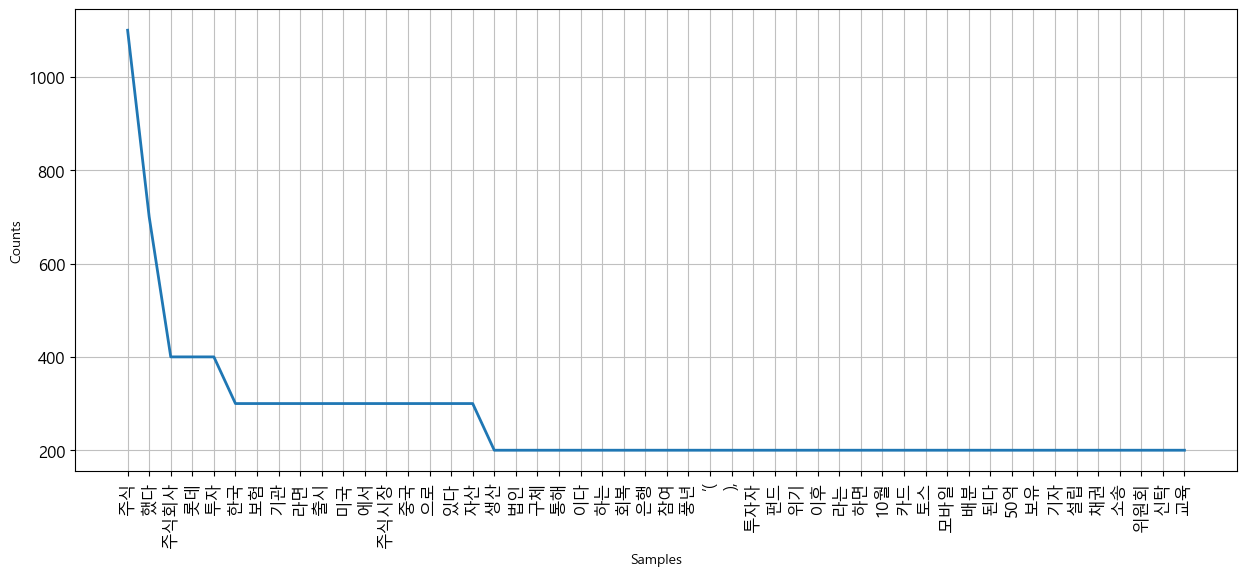

In [7]:
# 단어 별 등장 횟수 시각화
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

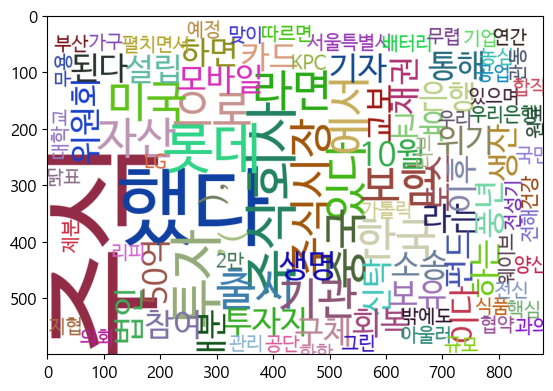

In [20]:
# 워드 클라우드 만들기
import pytagcloud

# 자주 등장하는 단어 추출
data = ko.vocab().most_common(101)
# 단어와 단어의 등장 횟수를 가지고 크기와 색상을 설정
taglist = pytagcloud.make_tags(data, maxsize=200)
#print(taglist)

# 워드 클라우드를 이미지 파일로 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600),
                           fontname='Korean', rectangular=False)
# 화면에 출력
import matplotlib.pyplot
import matplotlib.image

img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()


In [13]:
# 연관 단어 추출

!pip install gensim
from gensim.models import word2vec

lines = present_text
okt = Okt()
results = []

for line in lines:
    # 품사를 가지로 와서 Josa, Eomi, Punctuation을 제거
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
        
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)
    
    





생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수


반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의
개
서다

대다
행
기
관

홈
페
이
지다
를

통
해

밉다
수
령

주
식

유
무
를

확
인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권


들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해





늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의
개
서다

대다
행
기
관

홈
페
이
지다
를

통
해

밉다
수
령

주
식

유
무
를

확
인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다



양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면



분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보


손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의



추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면


릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다

구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L
G
화
학
과
의

합
작
법
인
인

하다
국
전
구
체
주
식
회
사

K
P
C

를

통
해

배
터
리

양
극
재

핵
심

원
료
인

전
구
체
를

연
간

2
만

톤

규
모
로

양
산
하다

예
정
이
다


아
울


전
해
동
박


생
산
하
늘다










우
리
은
행


그
린
웨
이
브


우
리
관
리
주
식
회
사


국
민
건
강
보
허다
공
단


가다
톨
릭
관
동
대다
학
교


서다
울
특
별
시
사
회
복
지다
협
의
회


부
산
은
행
이

차다
여
하다
다

협
약


차다
여
하다

기
관

및

기
업
들다
은

사
무
용

가다
구









펴다
치
면
서다

전
성
기
를

맞다
이
하다
다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높



5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다

광
복

후

귀
국
해

1
9
5
8
년

‘
대다
하다
교
육
보
허다

주
식
회
사

현

교
보
생
명


를

설
립
하다
다


회
사

창
립
과

함


추다
시
하다

교
육
보
허다
은

세
계

최
초
의

독
창
적
인

상
품
이
었
다
고

평
가다
되다
다


교
보
생
명









생
산
하다

수

있다
으
며


L


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의
개
서다

대다
행
기
관

홈
페
이
지다
를

통
해

밉다
수
령

주
식

유
무
를

확
인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다


다


농
심
의

전
신
인

롯
데
공
업
주
식
회
사
의

‘
롯
데

면

이

추다
시
되다

것
도

이

무
렵
이
다


이
밖

도

‘
풍
년

면


풍
년
식
품



‘
닭
표

면


신
하다
제
분











리
피
니
티
브


따다
르
면

기
관

투
자
자
들다
은

밉다
국

중
심
의

주
식

뮤
추
얼
펀
드
오다

상
장
지다
수
펀
드

서다

5
주

연
속

자
보다


빼
내

차
익

실
현


나
서다
다


지다
역

중
소
은
행
의

위
기
가다

있다
었
던

3
월

중
순
의

1
1
주









2
월

이
후

가다
장

높다
은

수
치
를

기
록
하다



이


따다


주
식
시
장

선

이
달

1
9

2
0
일

F
O
M
C

서다

연
준
이

기
준
금
리
를

동
결
하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의
개
서다

대다
행
기
관

홈
페
이
지다
를

통
해

밉다
수
령

주
식

유
무
를

확
인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다
다


주
식
인

퀴
노
아
오다

감
자
오다

같다
은

작
물
이

타
격


받다
았
고

가다
축
의

사
료
로

사
용
되다
늘다

귀
리
도

영
향


받다
았
다

호
수

주
변


여
행
하
늘다

관
광
객










골
프
장


매
입


위
해

설
립
하다

현
지다

법
인
이

보
유
하다

주
식


대다
여
금

반
환
채
권

등


대다
해

총

4
5
8
억
원

상
당


추
징

보
전
하다
다


서다
울

뉴
스
1









약

1
7
조

원

가다

낮
아
지다
다

머
스
크다
의

말


믿다
고

테
슬


주
식


채
권


옵
션

등


투
자
하다
던

투
자
자
들다
은

막
대다
하다

손
실


호
소
하
며

집
단

손
해
배
상

청
구

소
송


제
기
하다
다

밉다
국

증
권
거

위
원
회









받다
은

8
억
2
0
0
0
만

원
대다

주
식

등


백
지다
신
탁
하

늘다

주
식
백
지다
신
탁
심
사
위
원
회

요
구


불
복
해

소
송


진
행

중
이
다

고
도
예

기
자

y
e
a

d
o
n
g
a









벌
인

그
늘다


하다

거

늘다

믿다
음
이

더

강
화
되다
고

있다
습
니
다

중
국

증
시
늘다

이
날

모
처
럼

활
기
를









연
구
위
원
은

“
중
국
발

부
동
산

위
기

등
으
로

인
해

주
식
시
장
도

크다

폭
으
로

조
정
받다


수

있다
다
늘다

불
안
감
이

크다
지다
고

있다
다
”

며

“
중
국

정
부
가다

제
대다
로

되다

처
방
전


내
놓다
지다

못
하
면

하다
국
이
나









1
0
월

이
후

늘다

실
질
금
리
가다

크다
게

하
락
하
지다

않다
았
늘다
데
도

주
식
시
장
은

반
등


성
공
하다
다


인
플
레
이
션
이

정
점


통
과
하다
다
늘다

기
대다
가다

투
자
심
리

회
복


기
여
하다
다


실
제

지다
난
해

1
0
월
부
터

오다
해






■

롯
데
카
드


토
스
모
바
일

하다
인

신
용
카
드

추다
시

롯
데
카
드
늘다

알
뜰
폰

사
업
자

‘
토
스
모
바
일

의







주
주
들다
은

명
의
개
서다

대다
행
기
관

홈
페
이
지다
를

통
해

밉다
수
령

주
식

유
무
를

확
인
하다

수

있다
다









자
산

배
분
이
고

주
식

자
산

중

서다

밉다
국

주
식
과

하다
국

주
식
으
로

나
눠

투
자
하
면

‘
국
가다


대다
하다

분
산

투
자

가다

되다
다


글
로
벌

자
산

배
분
형

펀
드
늘다

다
각
화

효
과
를

적
극

활
용
하다

수

있다
늘다









5
0
억

원
은

유
상
증
자
로


나
머
지다

5
0
억

원
은

홍
진
영

보
유
주
식


인
수
하다
다

동
아
닷
컴

홍
세
영

기
자

p
r
o
j
e
c
t
h
o
n
g

d
o
n
g
a









농
작
물
이

심
각
하다

피
해
를

입
었
다
고

밝다
힌

바

있다


In [17]:
# 형태소 분석한 문장들을 파일에 저장한 후 Word2Vect 모델을 생성
data_file = '주식.data'
with open(data_file, 'w', encoding='utf-8') as fp :
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)
    
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1, min_count=2, sg=1)
# 모델을 저장
model.save("주식.model")
model = word2vec.Word2Vec.load("주식.model")
# 연관된 단어 추출 - 밉다와 연관 관계가 긍정적으로 높은 10개의 단어 추출
model.wv.most_similar(positive=['밉다'])

[('부', 0.207),
 ('톤', 0.186),
 ('징', 0.166),
 ('바', 0.148),
 ('투', 0.146),
 ('만', 0.146),
 ('컴', 0.140),
 ('예', 0.134),
 ('늘다', 0.130),
 ('이', 0.123)]

## tweet_temp.csv 파일의 내용을 읽어서 손흥민 관련 연관 규칙 분석

In [21]:
df = pd.read_csv('./data/data/data/tweet_temp.csv')
df.head()

created                                         tweet_text
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...

In [23]:
# 한글만 추출
import re

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+') # 한글 정규 표현식
    # 한글이 아닌 것은 전부 ''로 치환
    result = hangul.sub('',text)
    return result
df['ko_text'] = df['tweet_text'].apply(lambda x:text_cleaning(x))
print(df.head())

               created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...   
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...   
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...   

                                             ko_text  
0                                                     
1    트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    
2    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...  
3                                           귀여워 손흥민   
4    경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...  


In [26]:
# 한글 형태소 분석
from konlpy.tag import Okt
from collections import Counter

# 한국어 불용어 사전
korean_stopwords_path = './data/data/data/stopwords.txt'
with open(korean_stopwords_path, encoding='utf8') as f :
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
#print(stopwords)

def get_nouns(x) :
    nouns_tagger = Okt()
    # 형태소 분석
    nouns = nouns_tagger.nouns(x)
    # 1글자 제거    
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

df['nouns'] = df['ko_text'].apply(lambda x:get_nouns(x))
df.head()

created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...   
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...   
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...   

                                             ko_text  \
0                                                      
1    트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스     
2    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...   
3                                           귀여워 손흥민    
4    경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...   

                                               nouns  
0                                                 []  
1  [트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국...  
2                                          [손흥민, 말씀]  
3                                              [손흥민]  
4  [경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,...

In [36]:
!pip install apyori

In [37]:
# 거래 생성
!pip install apyori

transactions = [['손흥민','케인'],['손흥민','시소코'],['손흥민','포체티노','케인']]

from apyori import apriori
# 지지도 0.5이상 향상도 1.0이상 신뢰도 0.6이상인 거래만 확인
results = list(apriori(transactions, min_support=0.5, min_confidence=0.6, min_lift=1.0, max_length=2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])


In [39]:
# 데이터프레임의 데이터를 list로 변환
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction]

results = list(apriori(transactions, min_support=0.1, min_confidence=0.2, min_lift=5, max_length=2))

for result in results:
    print(result)

RelationRecord(items=frozenset({'국가대표팀', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'금메달', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'모습', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'아시아', '게임'}), support=0.14285714285714285, ordere

In [40]:
# 결과를 DataFrame 으로 변환 - 1개의 상품의 경우는 제거
columns = ['source','target','support']
network_df = pd.DataFrame(columns=columns)

for result in results :
    if len(result.items) == 2 :
        # 결과의 item 이름을 가지고 와서 list로 생성
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        # 시리즈로 변환
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
print(network_df.head())
        

  source target   support
0  국가대표팀     게임  0.142857
1    금메달     게임  0.142857
2     모습     게임  0.142857
3    아시아     게임  0.142857
4     의조     게임  0.142857


C:\Users\USER\AppData\Local\Temp\ipykernel_10200\4207244969.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\4207244969.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\4207244969.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\4207244969.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = netwo

### 네트워크 시각화

In [41]:
tweet_corpus = ''.join(df['ko_text'].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [42]:
# 각 단어가 몇개씩 있는지 확인
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


In [45]:
# 단어 이름을 node로 빈도수를 nodesize로 하는 데이터프레임 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize']>=50]
node_df.head()

node  nodesize
2    축구       140
4   손흥민       560
5    선수       140
7    모델       105
10   한국       105

In [46]:
# 네트워크 시각화 패키지 설치
!pip install networkx

In [59]:
import networkx as nx
plt.figure(figsize=(25,25))

# 그래프 인스턴스 생성
G = nx.Graph()

# 노드 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# 노드 사이의 간선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# 한글이 있는 경우 폰트 설정 - Mac은 AppleGothic Windows는 Malgun Gothic
nx.draw_networkx_labels(G, pop=pos, font_family='Malgun Gothic',font_size=25)
ax = plt.gca()
plt.show()


TypeError: '_AxesStack' object is not callable

<Figure size 2500x2500 with 0 Axes>

In [61]:
# 데이터 읽어오기
movies = pd.read_csv('./data/data/data/tmdb/tmdb_5000_movies.csv')
print(movies.shape) #(4803,20)

(4803, 20)


In [62]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               